In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
# Dataset contains 25 columns 
# some datatypes are object 
# some columns are empty which will be removed 

In [6]:
# checking duplicated values 
df.duplicated().sum()

0

In [7]:
# no duplicated entry exist
# there are lots of null enteries present which we will manage after deleting irrelavant column


In [8]:
# Removing empty and irrelavant column 
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [9]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [11]:
# latitude and longitude will be filled with mean or median
# Other fuel option is pretty complicated as different powerplant use different fuel 
# Power generation having 7 columns (2013-2018) we will keep all data intact as these are real values 
# Generation data source has most of the data missing so we drop it as well 

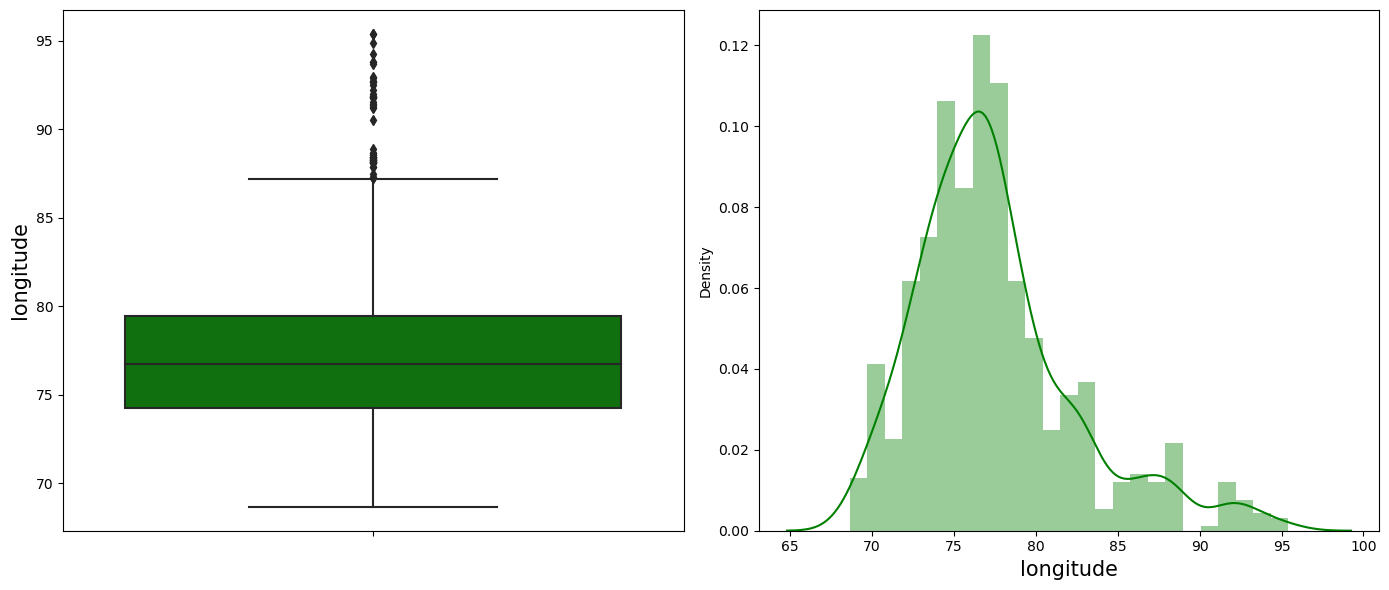

In [12]:
# Missing value imputation 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='green')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='g')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
# As outliers are present and we know mean is highly affected by outliers therefore we use median to impute this column 

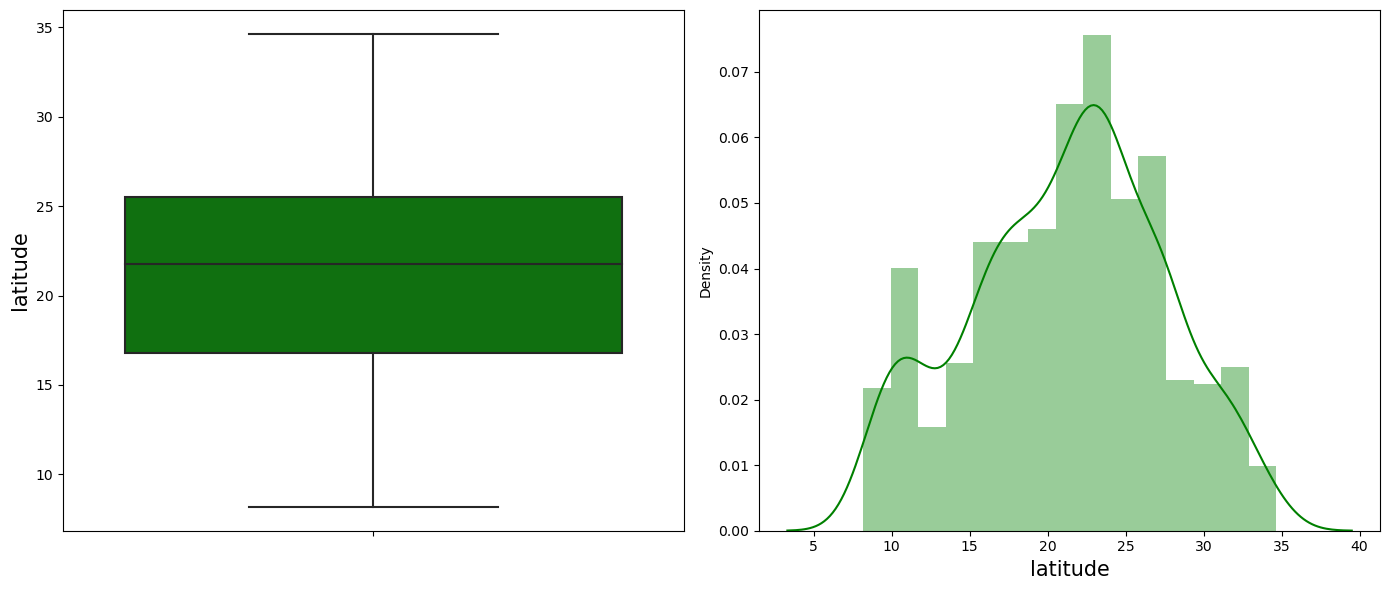

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='green')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='g')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [15]:
# As outliers are not present we will impute this column with mean 

In [16]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())


In [17]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [18]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source          0
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [23]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


In [63]:
# let's check the distribution 
num_features = ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','commissioning_year']

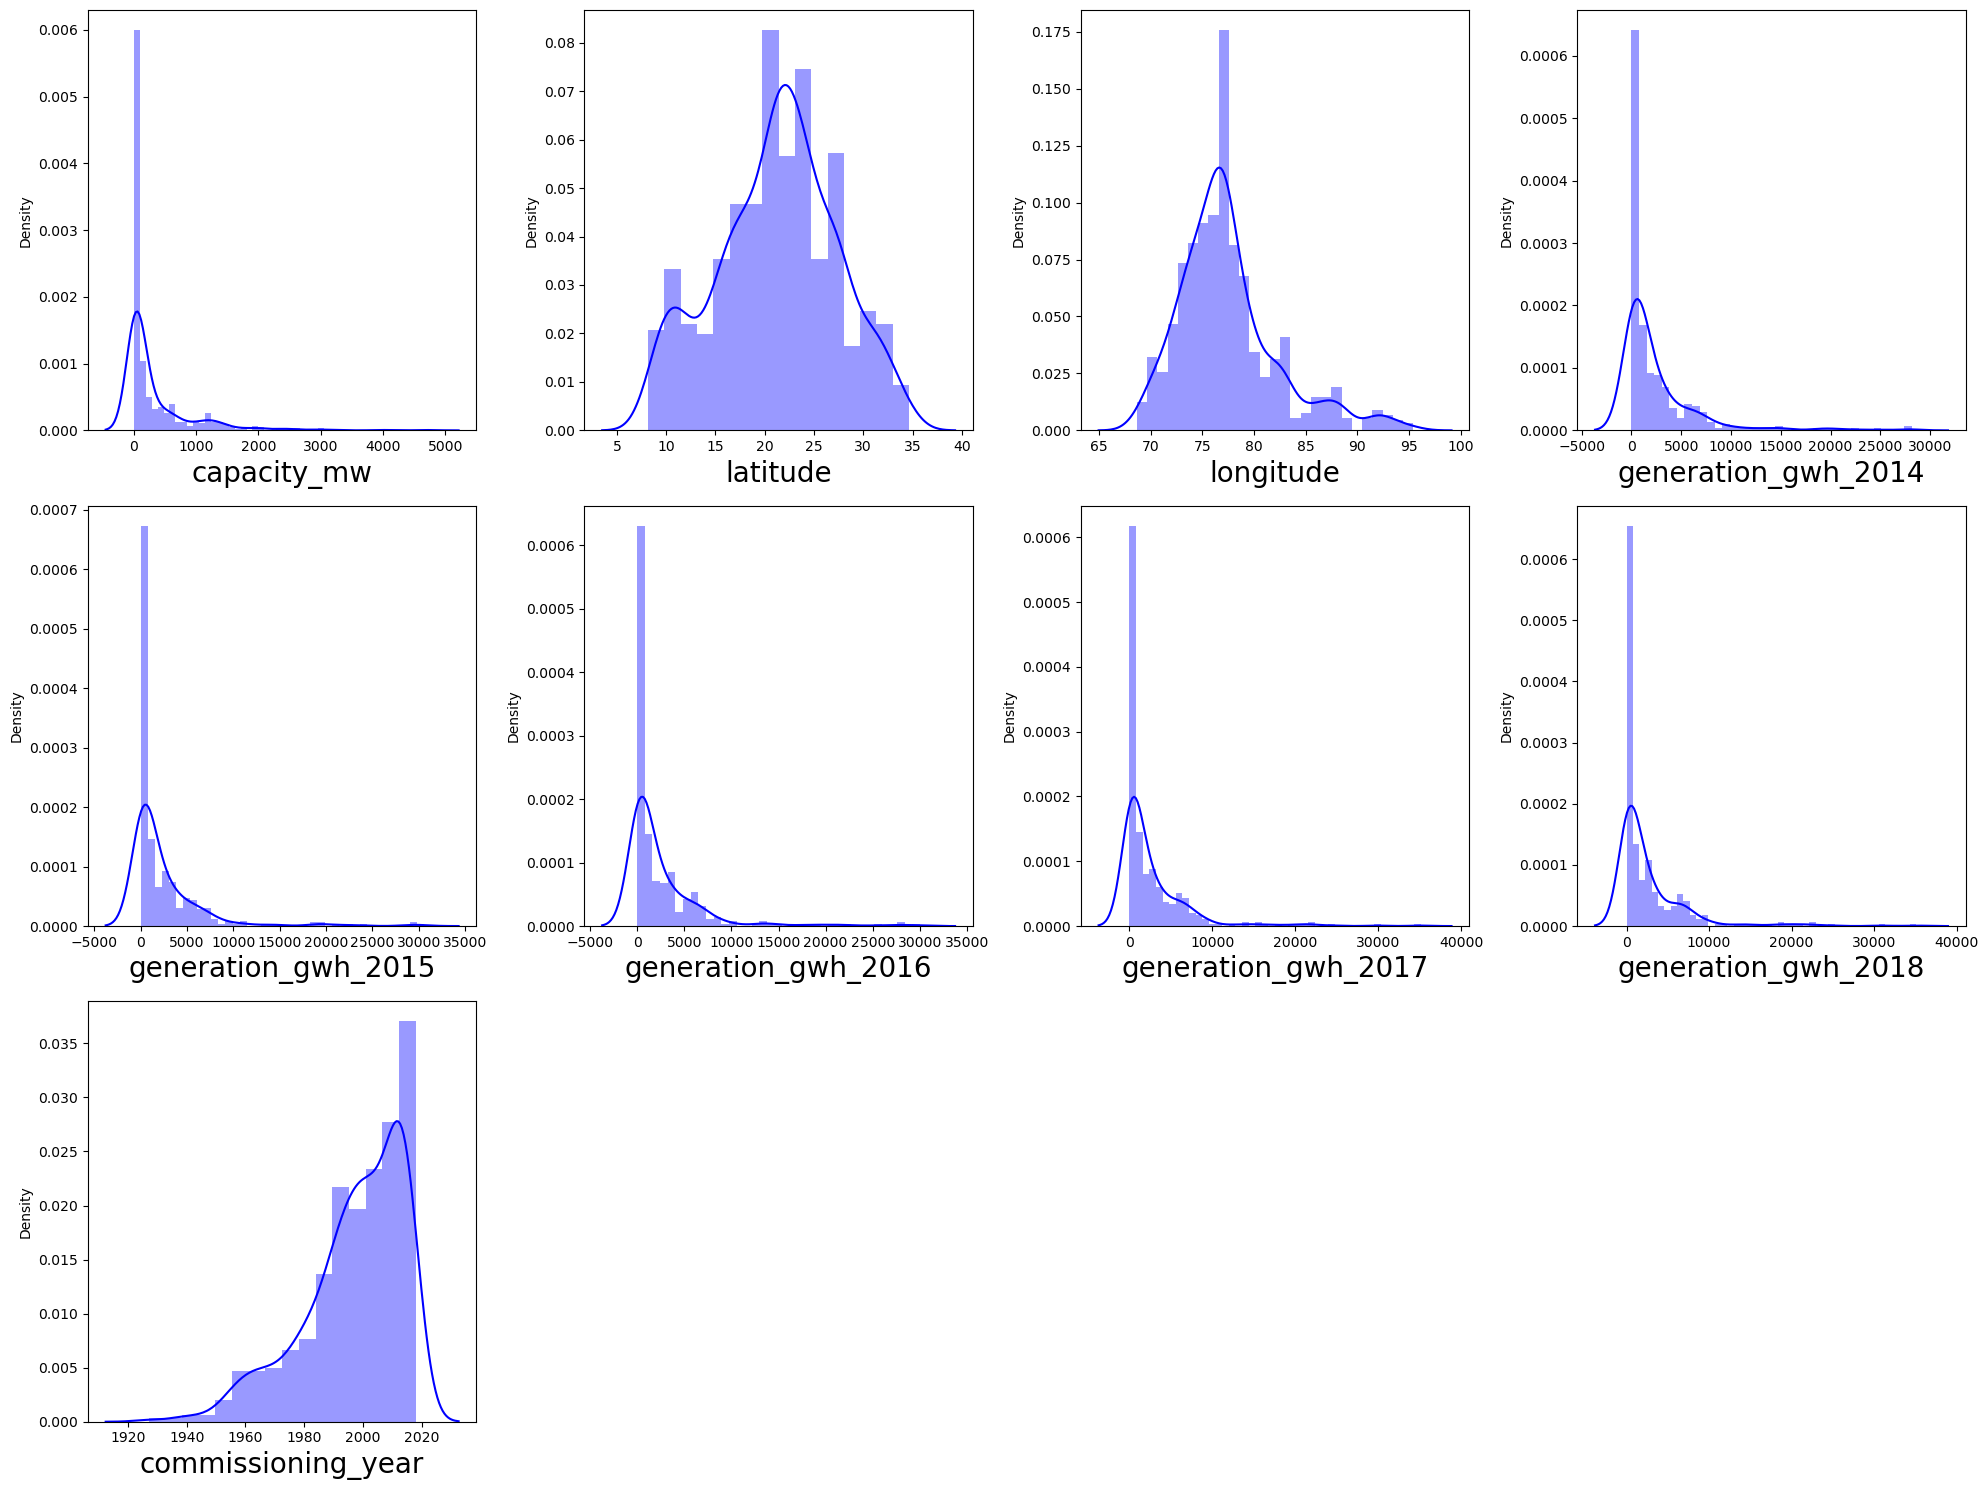

In [64]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in num_features:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int64  
 4   other_fuel1          907 non-null    int64  
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    int64  
 7   geolocation_source   907 non-null    int64  
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
 13  generation_gwh_2019  0 non-null      float64
dtypes: float64(10), int64(4)
memory usage: 99.3 KB


In [66]:
# Encoding categorical variable 

In [67]:
df.drop(columns=['name'],axis=1,inplace=True)
df.drop(columns=['generation_data_source'],axis=1,inplace=True)
df.drop(columns=['generation_gwh_2013'],axis=1,inplace=True)


KeyError: "['name'] not found in axis"

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int64  
 4   other_fuel1          907 non-null    int64  
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    int64  
 7   geolocation_source   907 non-null    int64  
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
 13  generation_gwh_2019  0 non-null      float64
dtypes: float64(10), int64(4)
memory usage: 99.3 KB


In [69]:
df.drop(columns=['generation_gwh_2013'],axis=1,inplace=True)
df.drop(columns=['generation_gwh_2019'],axis=1,inplace=True)

KeyError: "['generation_gwh_2013'] not found in axis"

In [70]:
# seperate categorical column
category = ['primary_fuel','other_fuel1','source','geolocation_source']

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,3,NaN,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,617.789264,843.747,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN


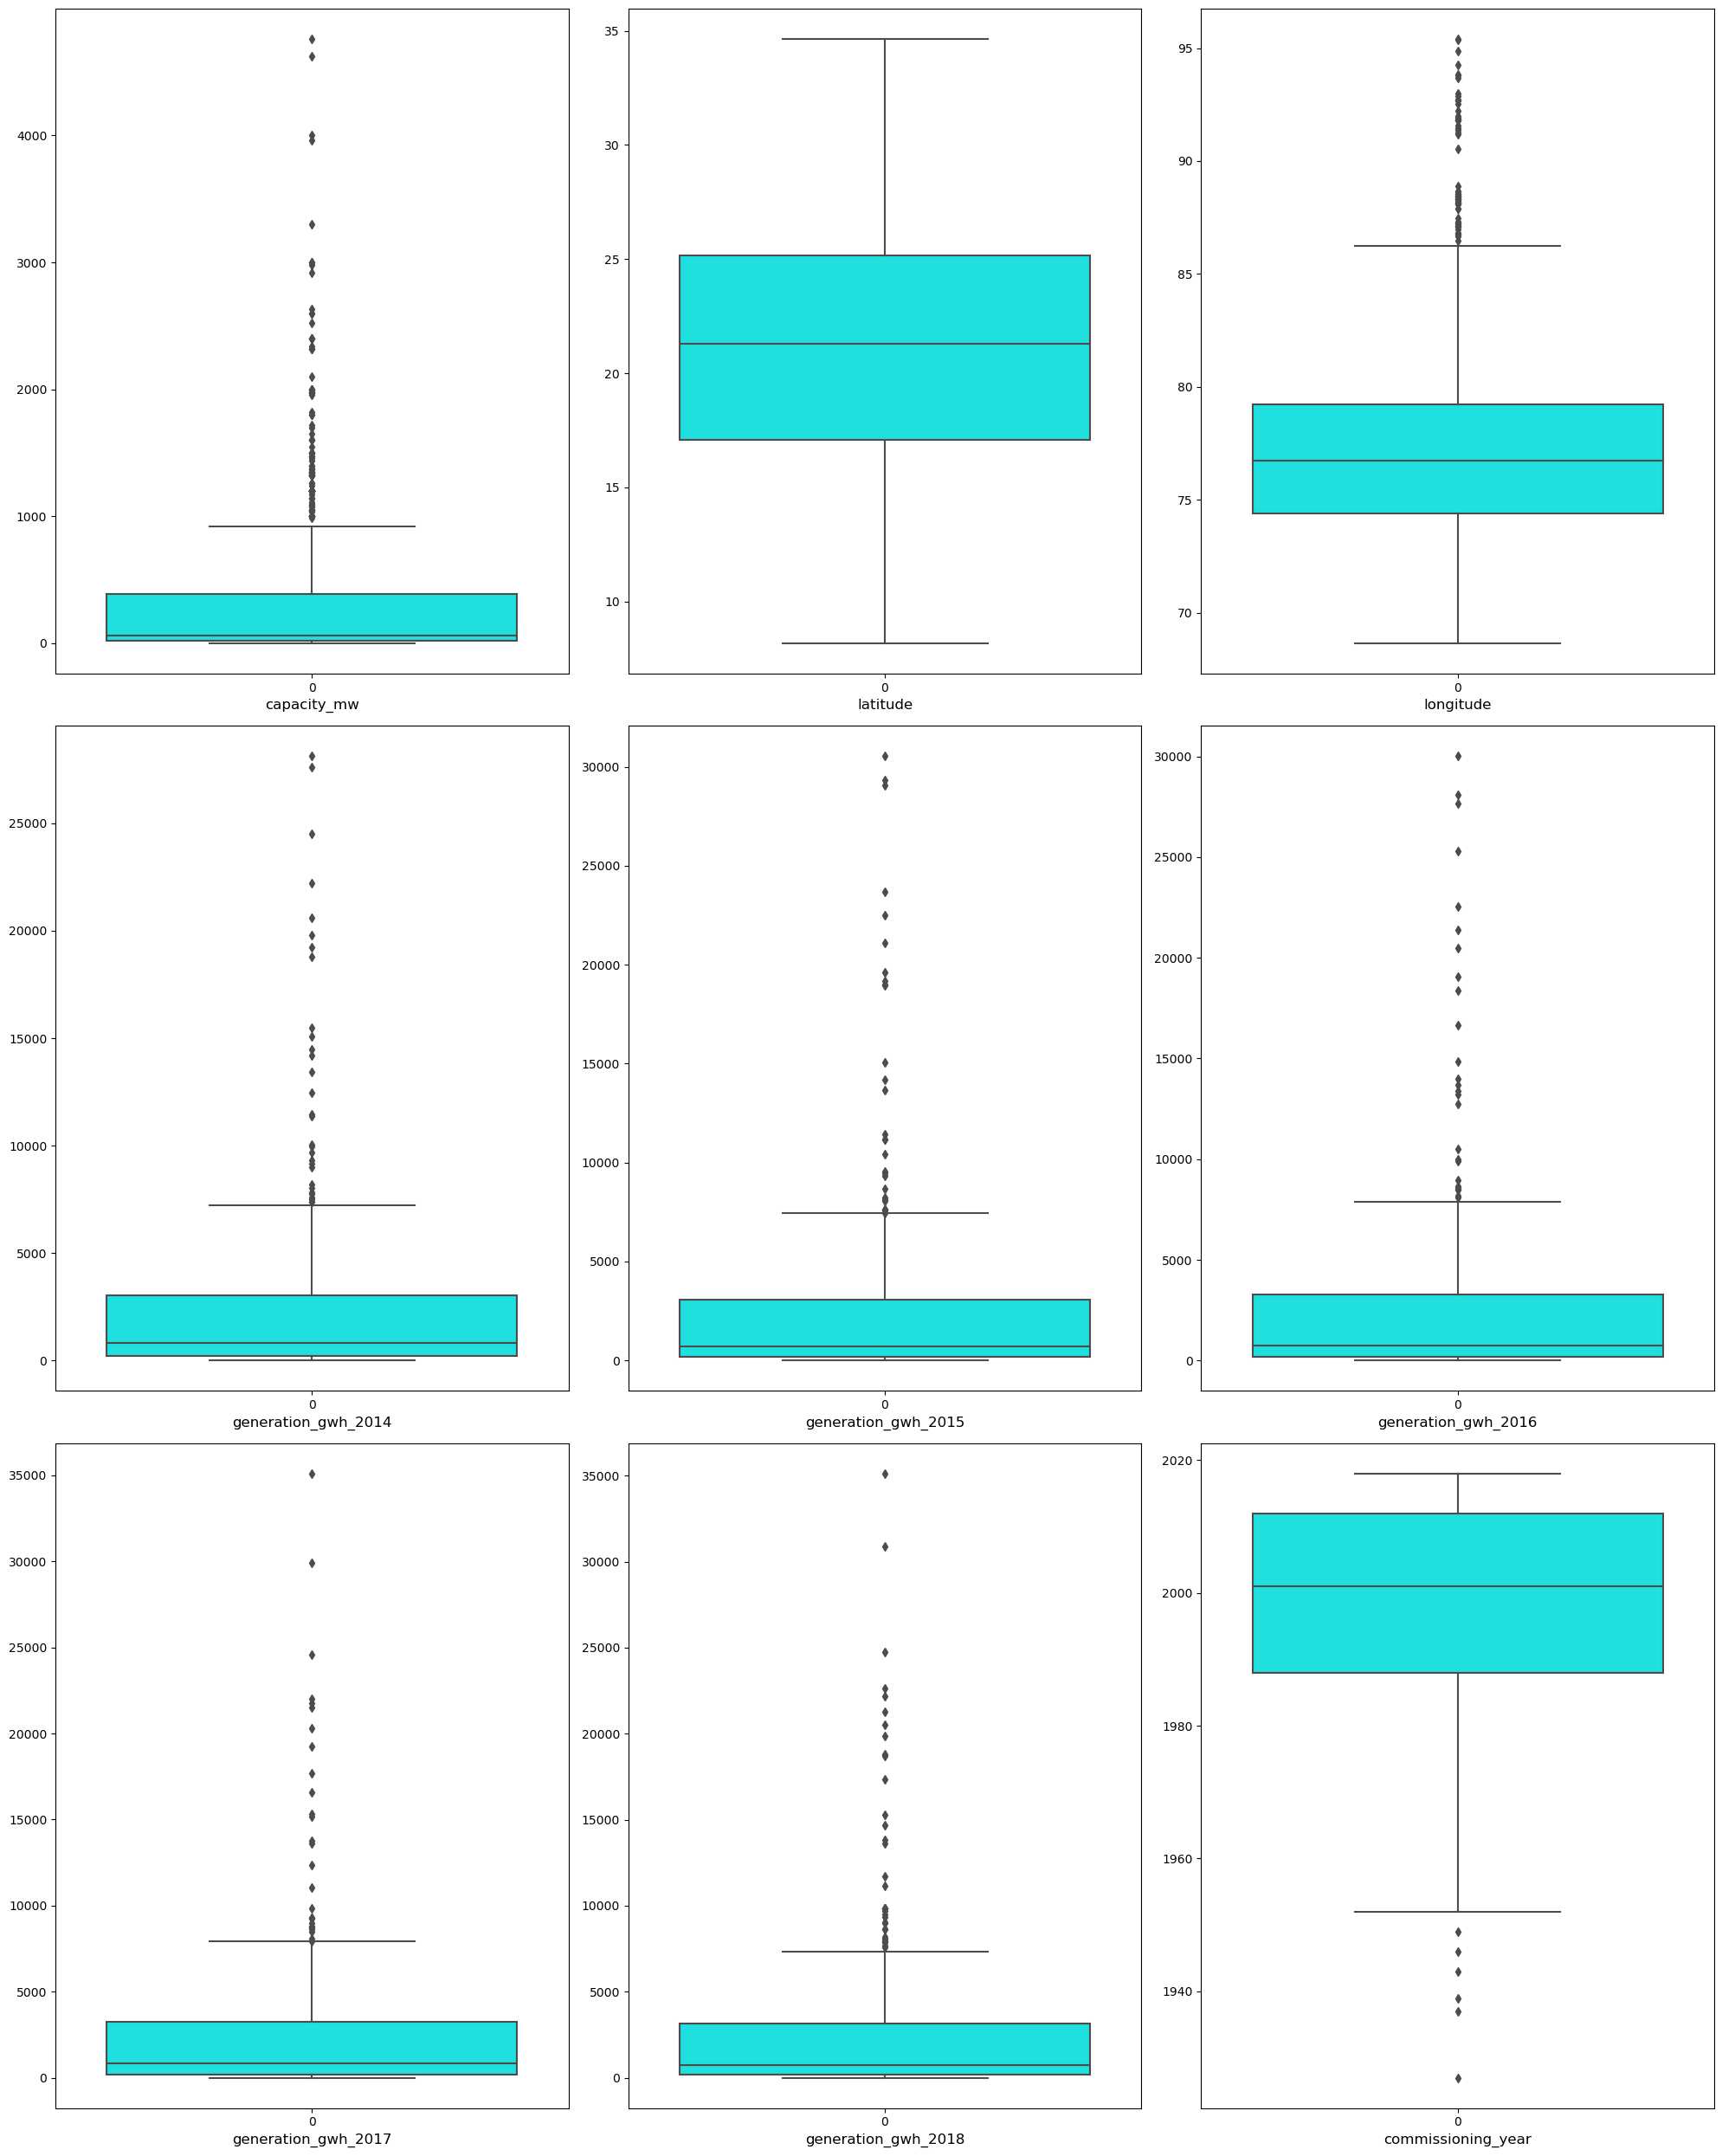

In [72]:
# checking for outliers 
plt.figure(figsize=(20,25))
plotnumber=1
for col in num_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int64  
 4   other_fuel1          907 non-null    int64  
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    int64  
 7   geolocation_source   907 non-null    int64  
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
 13  generation_gwh_2019  0 non-null      float64
dtypes: float64(10), int64(4)
memory usage: 99.3 KB


In [ ]:
# There are outliers in the Data 

In [74]:
df2=df.copy

In [75]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
commissioning_year       87.00000
source                   97.10000
geolocation_source        2.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
generation_gwh_2019           NaN
dtype: float64


In [76]:
df.drop(columns=['generation_gwh_2019'],axis=1,inplace=True)

In [77]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 14)


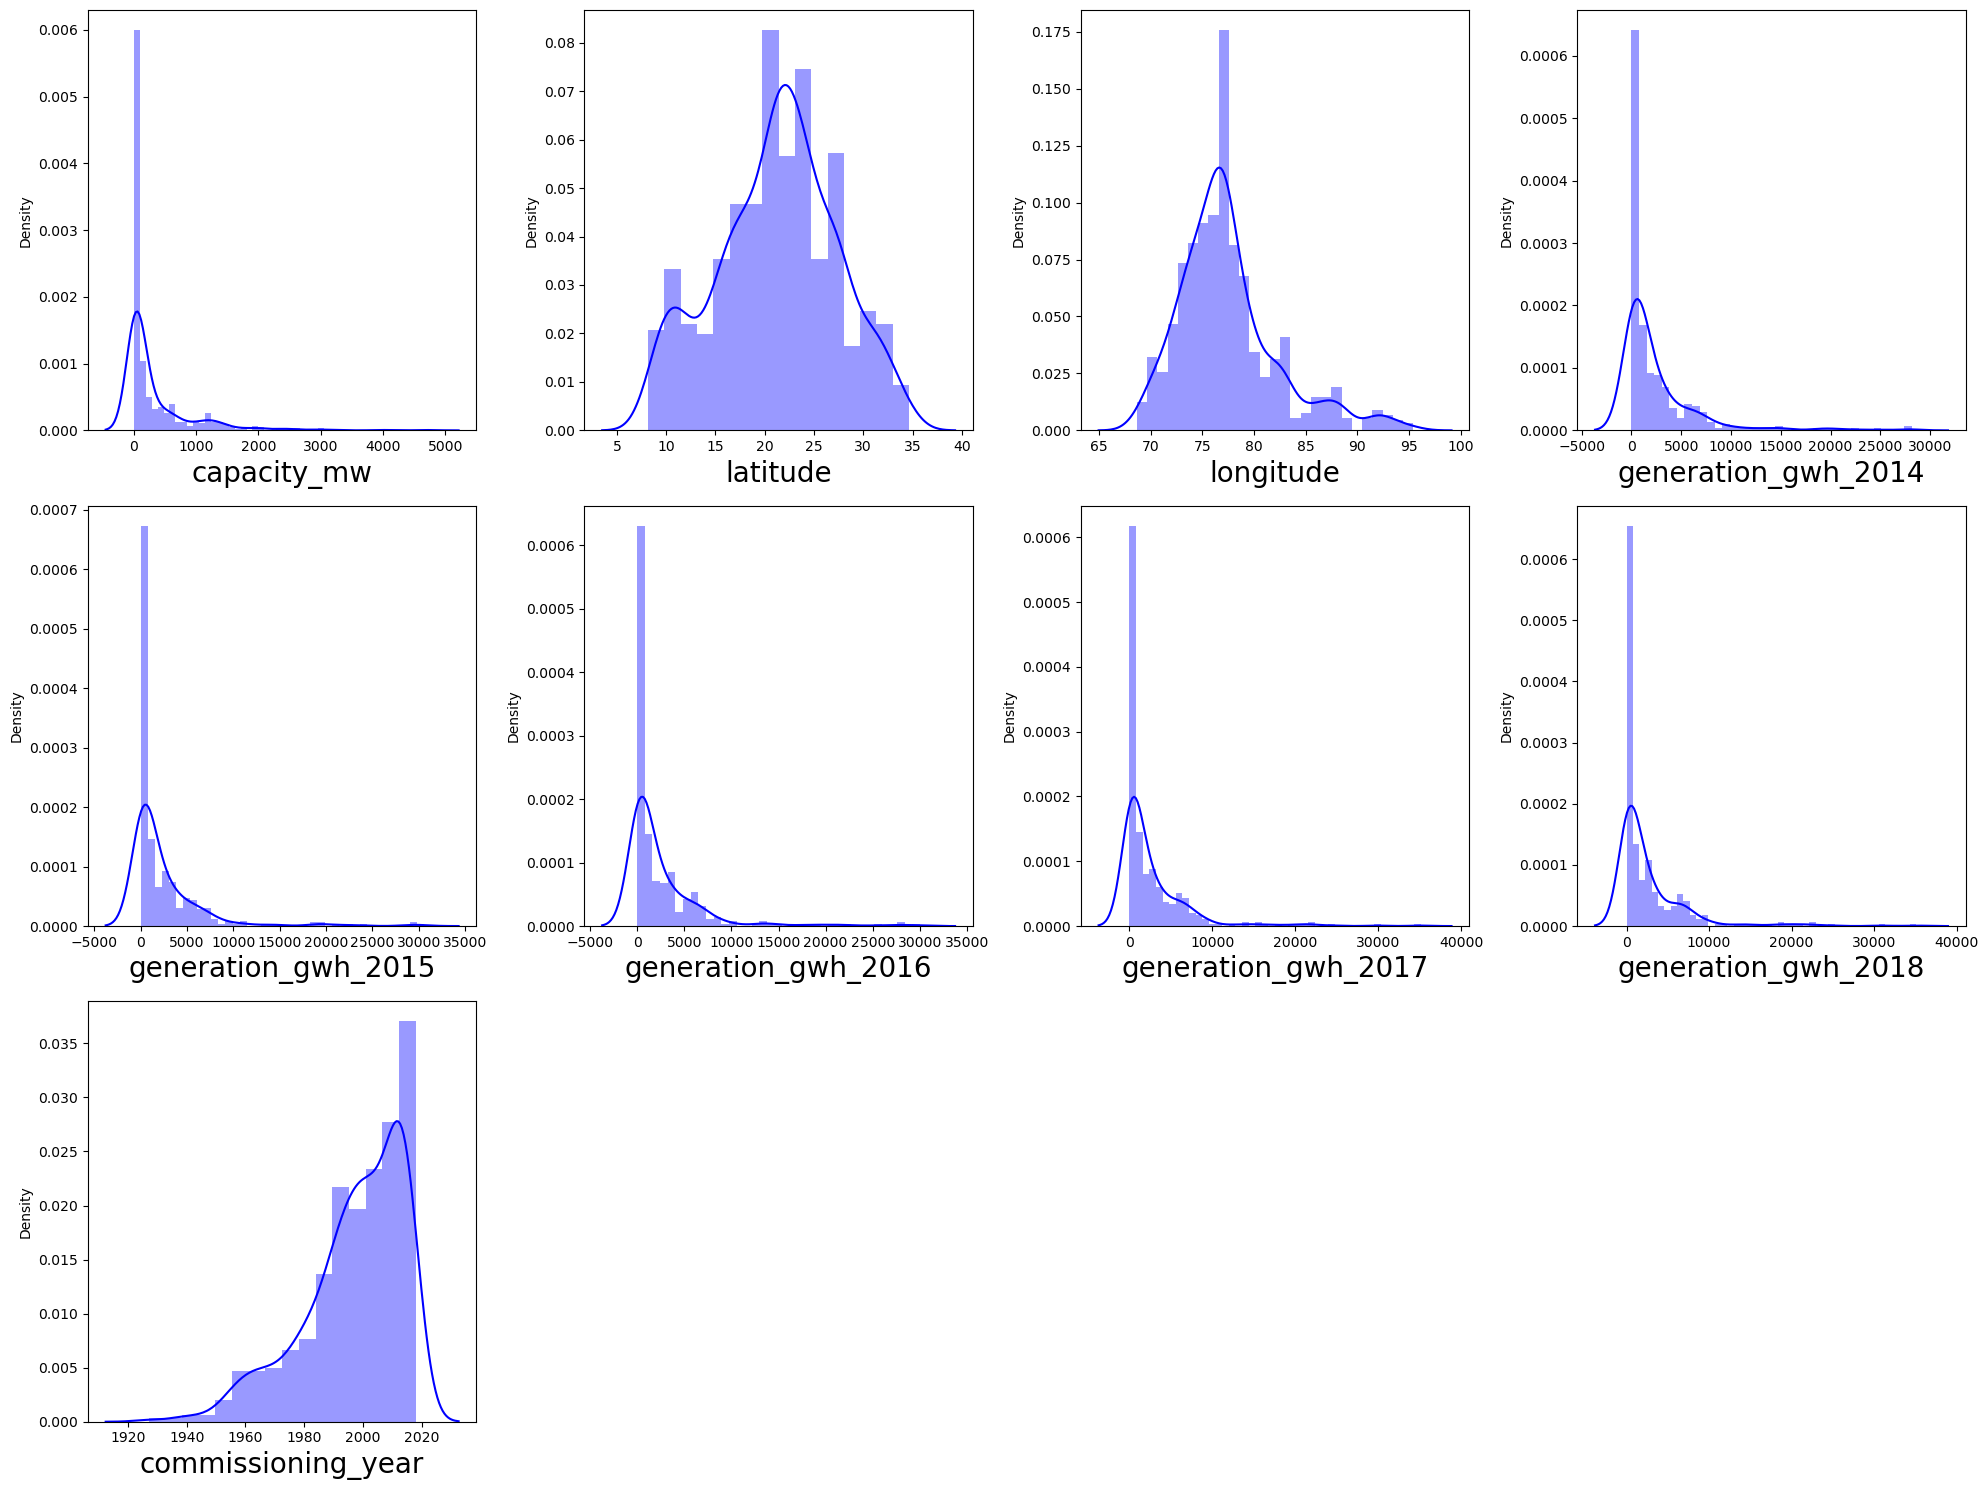

In [78]:
# let's check the distribution again 
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in num_features:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [98]:
df3.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.472251
other_fuel1           -1.626786
commissioning_year    -1.067949
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [99]:
from sklearn.preprocessing import PowerTransformer
for col in df3.columns:
    if df3.skew().loc[col]>0.55:
        df3[col]=np.log1p(df3[col])

In [100]:
df3.skew()

capacity_mw            0.135454
latitude              -0.149698
longitude              0.958932
primary_fuel           0.472251
other_fuel1           -1.626786
commissioning_year    -1.067949
source                 0.866582
geolocation_source    -2.159841
generation_gwh_2014   -1.242131
generation_gwh_2015   -1.095040
generation_gwh_2016   -1.099966
generation_gwh_2017   -1.135893
generation_gwh_2018   -1.161071
dtype: float64

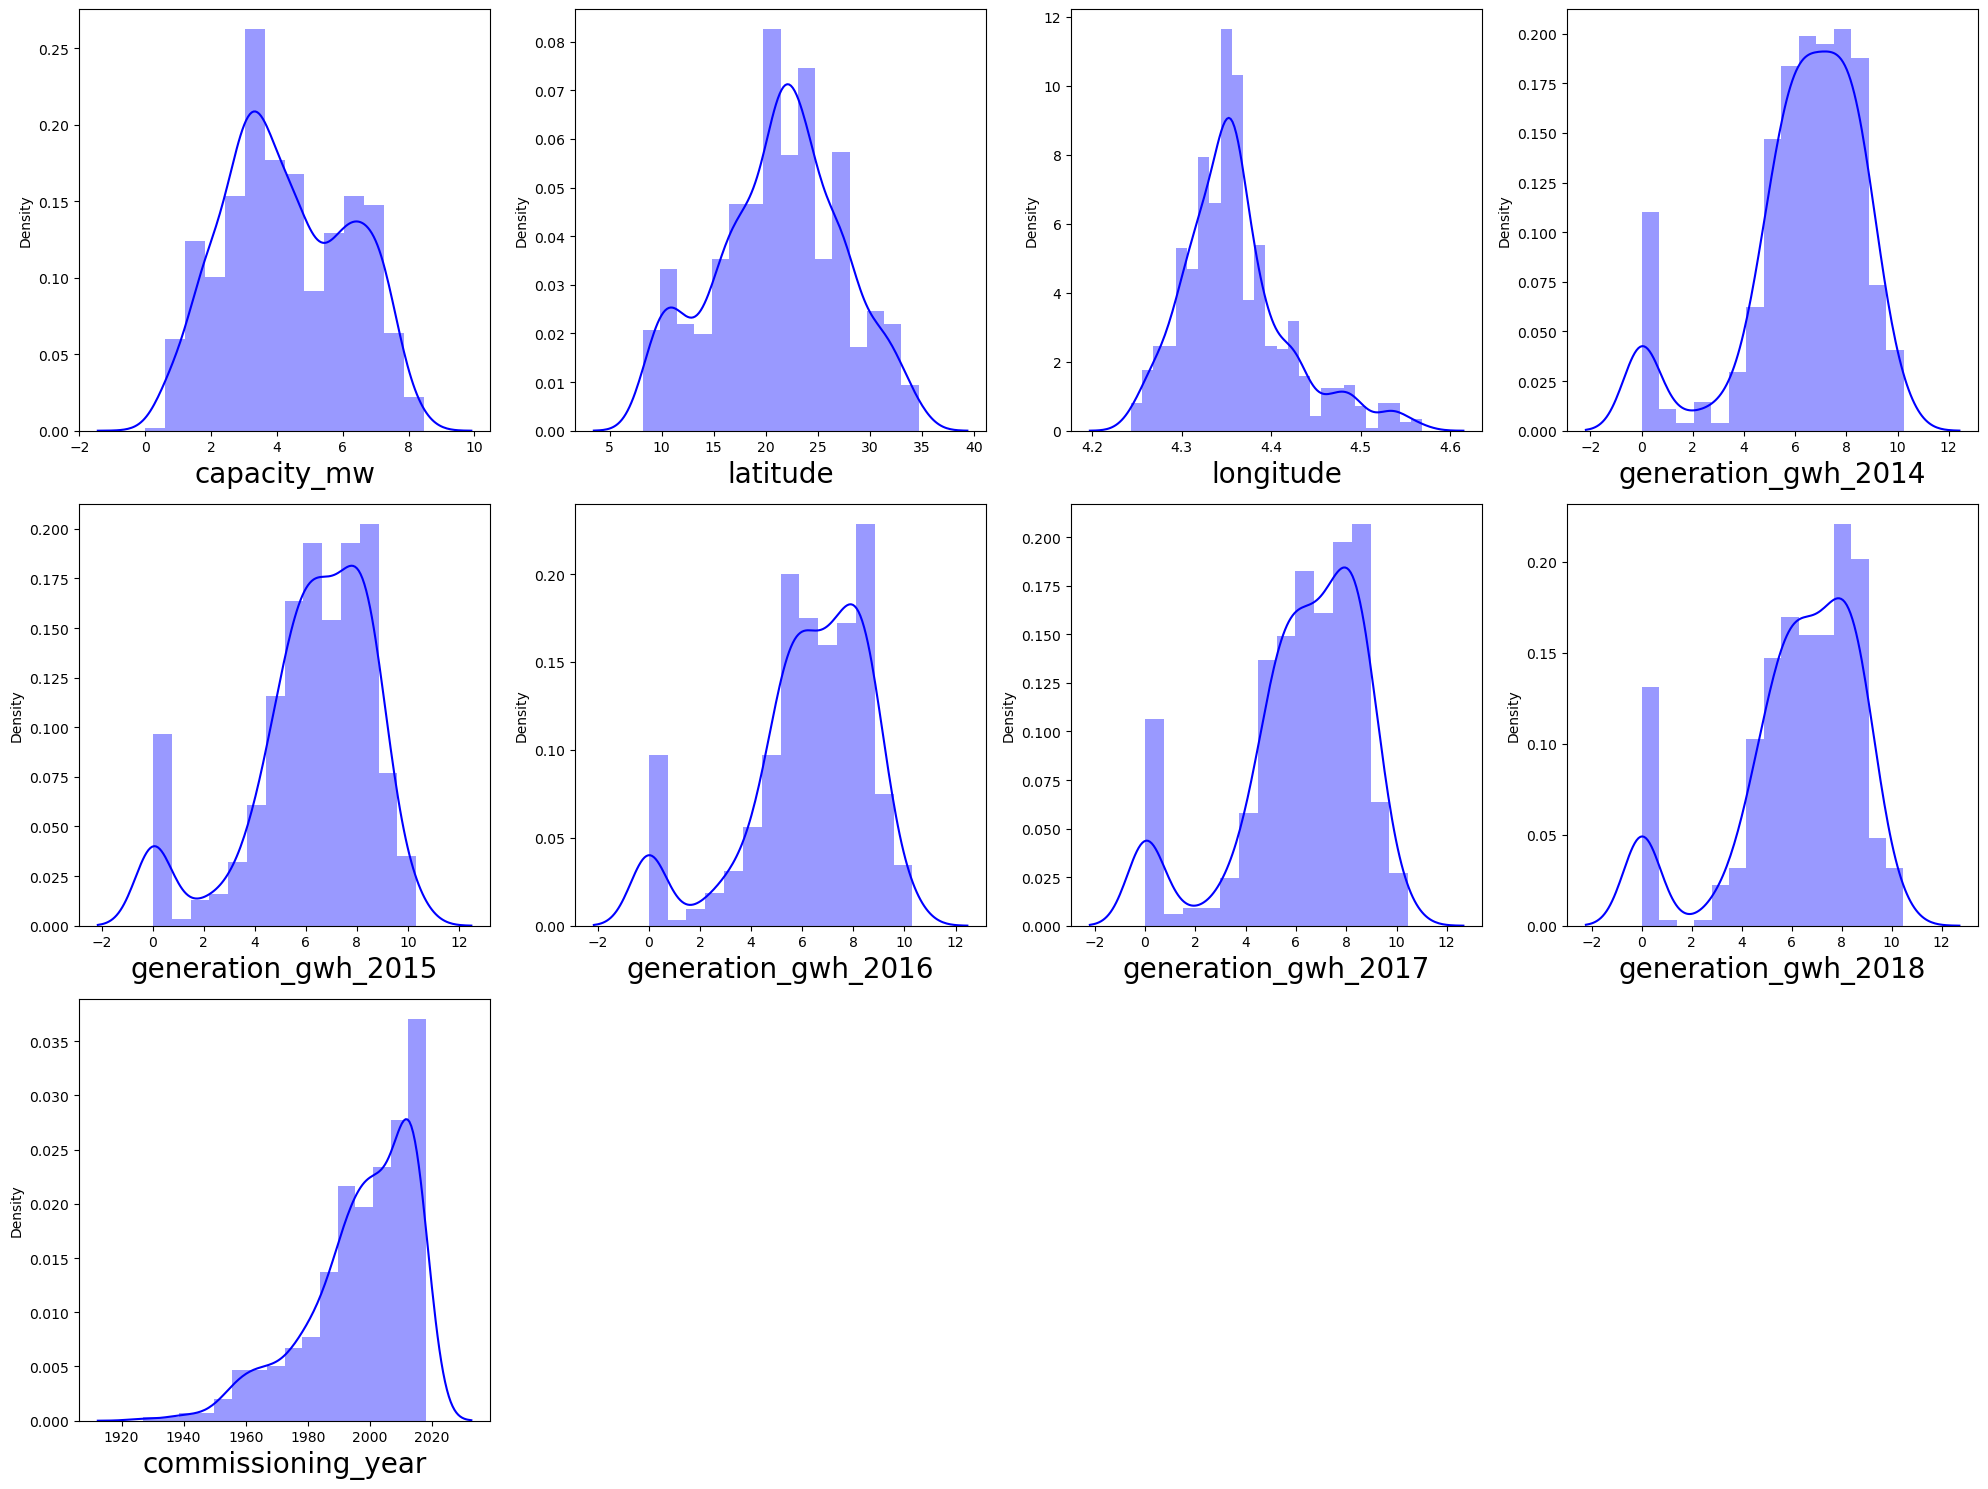

In [101]:
# let's check the distribution again 
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in num_features:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df3[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [104]:
df3

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.252763,28.1839,4.307313,6,3,2011.0,4.700480,1,NaN,NaN,NaN,NaN,NaN
1,4.595120,24.7663,4.325575,1,3,NaN,5.164786,2,NaN,NaN,NaN,NaN,NaN
2,3.693867,21.9038,4.253813,7,3,NaN,3.091042,2,NaN,NaN,NaN,NaN,NaN
3,4.912655,23.8712,4.525696,2,3,2004.0,3.135494,2,6.427765,6.739037,6.787850,6.499448,6.441328
4,7.496097,21.9603,4.423757,1,2,2015.0,3.135494,2,8.018477,8.685647,8.739376,8.591666,8.892886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,7.378384,16.2949,4.361273,1,2,2016.0,3.135494,2,NaN,0.690581,5.457868,6.764347,6.533062
903,1.386294,12.8932,4.371539,6,3,NaN,4.356709,0,NaN,NaN,NaN,NaN,NaN
904,3.277145,15.2758,4.338350,7,3,NaN,3.091042,2,NaN,NaN,NaN,NaN,NaN
905,4.394449,24.3500,4.314118,1,3,NaN,4.094345,2,NaN,NaN,NaN,NaN,NaN


In [105]:
df3['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())

In [106]:
df3.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [108]:
# Let's remove missing data 

df3.drop("generation_gwh_2014",axis=1,inplace=True)
df3.drop("generation_gwh_2015",axis=1,inplace=True)
df3.drop("generation_gwh_2016",axis=1,inplace=True)
df3.drop("generation_gwh_2017",axis=1,inplace=True)
df3.drop("generation_gwh_2018",axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            907 non-null    float64
 2   longitude           907 non-null    float64
 3   primary_fuel        907 non-null    int64  
 4   other_fuel1         907 non-null    int64  
 5   commissioning_year  907 non-null    float64
 6   source              907 non-null    float64
 7   geolocation_source  907 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.8 KB


In [110]:
# Let's move onto machine learning model building 
# Importing necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score



In [111]:
# Splitting data in target and dependent feature
X = df3.drop(['primary_fuel'], axis =1)
Y = df3['primary_fuel']

In [112]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)

# Logistic Regression

In [114]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7582417582417582


Confusion matrix of Logistics Regression : 
 [[ 9  0  0  2  0  0  0  1]
 [ 2 67  1  4  0  0  0  0]
 [ 2  3  7  9  0  0  0  2]
 [ 0  0  7 58  1  0  0 12]
 [ 0  0  0  0  0  0  0  0]
 [ 1  2  0  4  0  0  0  1]
 [ 0  3  0  0  0  0 34  0]
 [ 0  0  1  8  0  0  0 32]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.89      0.91      0.90        74
           2       0.44      0.30      0.36        23
           3       0.68      0.74      0.71        78
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         8
           6       1.00      0.92      0.96        37
           7       0.67      0.78      0.72        41

    accuracy                           0.76       273
   macro avg       0.54      0.55      0.54       

# Decision Tree Classifier 

In [115]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.8681318681318682


Confusion matrix of DecisionTreeClassifier : 
 [[10  2  0  0  0  0  0  0]
 [ 4 70  0  0  0  0  0  0]
 [ 1  3 10  6  1  2  0  0]
 [ 0  0  7 67  1  3  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  2  1  3  0  2  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 41]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.91      0.95      0.93        74
           2       0.56      0.43      0.49        23
           3       0.88      0.86      0.87        78
           4       0.00      0.00      0.00         0
           5       0.29      0.25      0.27         8
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        41

    accuracy                           0.87       273
   macro avg       0.66      0.67      0.6

# Random Forest Classifier 

In [116]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8791208791208791


Confusion matrix of RandomForestClassifier : 
 [[10  2  0  0  0  0  0]
 [ 2 71  0  1  0  0  0]
 [ 1  3 10  7  2  0  0]
 [ 0  0  6 72  0  0  0]
 [ 0  2  1  3  2  0  0]
 [ 0  3  0  0  0 34  0]
 [ 0  0  0  0  0  0 41]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.88      0.96      0.92        74
           2       0.59      0.43      0.50        23
           3       0.87      0.92      0.89        78
           5       0.50      0.25      0.33         8
           6       1.00      0.92      0.96        37
           7       1.00      1.00      1.00        41

    accuracy                           0.88       273
   macro avg       0.80      0.76      0.77       273
weighted avg       0.87      0.88      0.87       273



In [119]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier()
       ]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.73626374 0.80769231 0.7679558  0.79005525 0.79558011]
Mean Score : 0.7795094408354076
Std deviation : 0.025169155823659695




Cross Validation Score DecisionTreeClassifier() :

Score : [0.87912088 0.85164835 0.90055249 0.85635359 0.88950276]
Mean Score : 0.8754356141096473
Std deviation : 0.018827004851190727




Cross Validation Score RandomForestClassifier() :

Score : [0.87912088 0.90659341 0.9281768  0.87845304 0.92265193]
Mean Score : 0.9029992107340175
Std deviation : 0.02100356077443072




In [120]:
# Random Forest gives us maximum accuracy 
# So we tune hyper parameter for Random forest 
from sklearn.model_selection import GridSearchCV

In [121]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [122]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [123]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 70}

In [124]:
# Final classification model
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators=70, max_depth=10 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8974358974358975


In [125]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

# Ml Regression model building

In [127]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

AttributeError: 'function' object has no attribute 'info'